<h1> mols2grid usage </h1>

This colab demonstrates how to read dataframe from google sheets and then use mols2grid to display molecules.

# pip install

In [16]:
!pip install rdkit-pypi

     |████████████████████████████████| 19.7 MB 1.6 MB/s 


In [14]:
!pip install mols2grid

  Using cached mols2grid-0.1.0-py3-none-any.whl (33 kB)


# import

In [17]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True 

In [18]:
import mols2grid
import pandas as pd

In [19]:
%load_ext google.colab.data_table

## auth to google sheet

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [32]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vzehAYEbczbBfXz5xFpH8AFdJAc5eTvO7Yr-qXtSlSk/edit?usp=sharing')

# Read sheet tab

In [36]:
sheet_title = 'example_1' #@param ['example_1', 'example_2']

In [40]:
sheet = wb.worksheet(sheet_title)
data = sheet.get_all_values()

In [41]:
df = pd.DataFrame(sheet.get_all_values())
df.columns = df.iloc[0]
df = df.iloc[1:]
df.rename(columns={'smiles': 'SMILES'}, inplace=True)

 # display via mols2grid

In [42]:
mols2grid.display(df, subset=["img","example_id","y_pred"])

In [43]:
mols2grid.selection

/usr/local/lib/python3.7/dist-packages/mols2grid/select.py:102: UserWarning: Accessing the current grid's selection through `mols2grid.selection` is deprecated and will be removed soon. Please use `mols2grid.get_selection()` instead
  "Accessing the current grid's selection through "


{7: 'CC1C(C)=C(C)C=CC=1'}

In [44]:
df.iloc[list(mols2grid.selection.keys())]

/usr/local/lib/python3.7/dist-packages/mols2grid/select.py:102: UserWarning: Accessing the current grid's selection through `mols2grid.selection` is deprecated and will be removed soon. Please use `mols2grid.get_selection()` instead
  "Accessing the current grid's selection through "


,SMILES,example_id,y_pred
8,CC1C(C)=C(C)C=CC=1,MCULE-1130443786,0.8


# Alternatively, use RDKIT Draw.MolsToGridImage

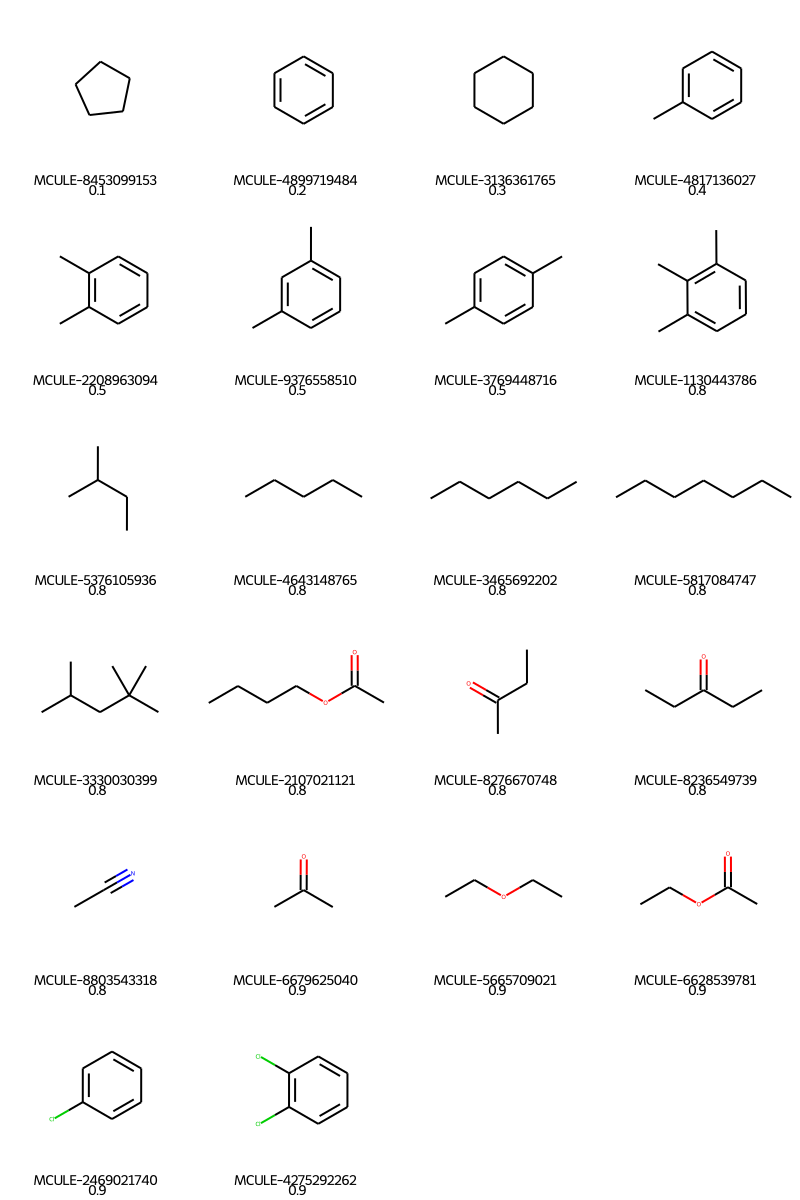

In [51]:
mols = [Chem.MolFromSmiles(smi) for smi in df['SMILES'].values]
legends = [f'{mol_id}\n{y_pred}' for mol_id,y_pred in df[['example_id', 'y_pred']].values]
Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True, legends=legends)